In [1]:
from bulk_lambert.bulk import propagate, lambert

from astropy import time
from astropy import units as u

import numpy as np

from poliastro.ephem import Ephem
from poliastro.twobody import Orbit
from poliastro.bodies import Earth, Mars, Sun
from poliastro.util import time_range

In [2]:
date_launch = time.Time("2011-11-26 15:02", scale="utc").tdb
date_arrival = time.Time("2012-08-06 05:17", scale="utc").tdb

earth = Ephem.from_body(Earth, time_range(date_launch, end=date_arrival))
mars = Ephem.from_body(Mars, time_range(date_launch, end=date_arrival))

ss_earth = Orbit.from_ephem(Sun, earth, date_launch)
ss_mars = Orbit.from_ephem(Sun, mars, date_arrival)

In [3]:
dates = time_range(start = time.Time("2016-01-01 00:00"), spacing = 7 * u.d, periods = 52 * 10)

In [4]:
earth_rr, earth_vv = propagate(ss_earth, dates)
mars_rr, mars_vv = propagate(ss_mars, dates)

In [13]:
epochs_select, tofs, dv, MM, dv1, dv2 = lambert(
    attractor = Sun,
    rr_i = earth_rr,
    vv_i = earth_vv,
    rr_f = mars_rr,
    vv_f = mars_vv,
    epoch_start = dates[0],
    epoch_stop = dates[-1],
    tof_steps_start = 4,
    tof_steps_stop = 105,
)

In [19]:
%timeit lambert(attractor = Sun, rr_i = earth_rr, vv_i = earth_vv, rr_f = mars_rr, vv_f = mars_vv, epoch_start = dates[0], epoch_stop = dates[-1], tof_steps_start = 4, tof_steps_stop = 105,)

552 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

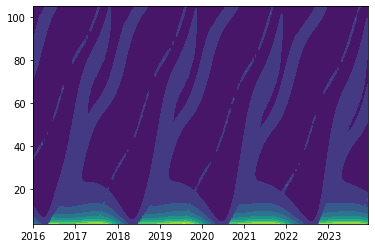

In [43]:
fig, ax = plt.subplots()

c = ax.contourf(
    [date.to_datetime() for date in epochs_select],
    [dt.value for dt in tofs.to(u.week)],
    np.transpose(dv),
)

In [48]:
fig.savefig('export.png')